In [138]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import random

In [139]:
df = pd.read_csv(r'D:\ML Assignment 3\df_out.csv', index_col = 0)
kvalues = [5, 10, 20]
scores = ["recall",'precision','accuracy','f1']

In [140]:
def classifying1(x):
    if x > 1: 
        return 1
    else:
        return 0

In [141]:
def preprocess_percentile(X_train, X_test, y_train, y_test, per=10):
    selector = SelectPercentile(f_classif, percentile=per)
    selector.fit(X_train, y_train)
    features_train_transformed = selector.transform(X_train)
    features_test_transformed  = selector.transform(X_test)

    return features_train_transformed, features_test_transformed, y_train, y_test

In [142]:
def preprocess_kbest(X_train, X_test, y_train, y_label, kbest=10):
    selector = SelectKBest(f_classif, k=kbest)
    selector.fit(X_train, y_train)
    features_train_transformed = selector.transform(X_train)
    features_test_transformed  = selector.transform(X_test)

    return features_train_transformed, features_test_transformed, y_train, y_label

In [143]:
df["classes"] = df['2015 PRICE VAR [%]'].apply(classifying1)
df.corrwith(df["2015 PRICE VAR [%]"]).sort_values(ascending = False)

2015 PRICE VAR [%]                 1.000000
Class                              0.652077
classes                            0.651469
EPS Diluted                        0.118955
EPS                                0.117757
                                     ...   
cashPerShare                      -0.052292
Cash per Share                    -0.052292
Shareholders Equity per Share     -0.056133
Property, Plant & Equipment Net   -0.059593
Book Value per Share              -0.097445
Length: 64, dtype: float64

In [144]:
df = df.drop(columns=['2015 PRICE VAR [%]','Class', 'Sector'])
nparray = df.to_numpy()

In [145]:
features = nparray[:,0:-1]
label = nparray[:,-1]

X = features
y = label

features.shape

(3788, 61)

In [146]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

# SVC Linear

In [147]:
resultsDF = pd.DataFrame([], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')
for i in range (0,3):  
    for k in kvalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            X_train, X_test, y_train, y_test = preprocess_kbest(X_train, X_test, y_train, y_test, k)
            param_grid = {'C': [0.1,0.5,0.7, 0.9,1,2,10,15,20], 'dual': [False]}
            SVC_GS = GridSearchCV(estimator = LinearSVC(),param_grid=param_grid, scoring = score , cv = 30,refit=True,verbose=1, n_jobs=-1)
            SVC_GS.fit(X_train,y_train)   
            y_pred = SVC_GS.predict(X_test)
            resultsSVM1 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsSVM1.insert(0,'SVMLinear RUN ' + str(i+1) + " k=" + str(k) +  " With Scoring method " + score)
            resultsSVM1.pop(4)
            resultsSVM1.insert(4, SVC_GS.score(X_train, y_train))
            resultsSVM1.insert(5, SVC_GS.score(X_test, y_test))


            SVM1_dataframe = pd.DataFrame([resultsSVM1], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM1_dataframe])
            print("The best estimator for RUN " + str(i+1) + " k = " + str(k) + " With Scoring method " + score + " : "  + str(SVC_GS.best_estimator_))
            print("The Confusion matrix for RUN " + str(i+1) + " k = " + str(k) + " With Scoring method " + score + " : " + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))
    

Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 5 With Scoring method recall : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 5 With Scoring method recall :  is 

[[[ 83 240]
  [ 60 375]]

 [[375  60]
  [240  83]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 5 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 5 With Scoring method precision :  is 

[[[ 65 235]
  [ 51 407]]

 [[407  51]
  [235  65]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 5 With Scoring method accuracy : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 5 With Scoring method accuracy :  is 

[[[ 83 235]
  [ 41 399]]

 [[399  41]
  [235  83]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits
The best estimator for RUN 1 k = 5 With Scoring method f1 : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 5 With Scoring method f1 :  is 

[[[ 81 239]
  [ 59 379]]

 [[379  59]
  [239  81]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 10 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 10 With Scoring method recall :  is 

[[[  3 318]
  [  6 431]]

 [[431   6]
  [318   3]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 10 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 10 With Scoring method precision :  is 

[[[ 84 232]
  [ 61 381]]

 [[381  61]
  [232  84]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 10 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 10 With Scoring method accuracy :  is 

[[[ 13 302]
  [ 23 420]]

 [[420  23]
  [302  13]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 10 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 10 With Scoring method f1 :  is 

[[[ 14 311]
  [ 18 415]]

 [[415  18]
  [311  14]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 20 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 20 With Scoring method recall :  is 

[[[ 14 300]
  [ 35 409]]

 [[409  35]
  [300  14]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 20 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 20 With Scoring method precision :  is 

[[[  2 310]
  [ 10 436]]

 [[436  10]
  [310   2]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 20 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 20 With Scoring method accuracy :  is 

[[[ 15 289]
  [ 35 419]]

 [[419  35]
  [289  15]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k = 20 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 1 k = 20 With Scoring method f1 :  is 

[[[ 11 297]
  [ 19 431]]

 [[431  19]
  [297  11]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 5 With Scoring method recall : LinearSVC(C=0.9, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 5 With Scoring method recall :  is 

[[[ 84 220]
  [ 49 405]]

 [[405  49]
  [220  84]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 5 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 5 With Scoring method precision :  is 

[[[ 75 251]
  [ 65 367]]

 [[367  65]
  [251  75]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 5 With Scoring method accuracy : LinearSVC(C=0.7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 5 With Scoring method accuracy :  is 

[[[ 70 234]
  [ 64 390]]

 [[390  64]
  [234  70]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 5 With Scoring method f1 : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 5 With Scoring method f1 :  is 

[[[ 77 218]
  [ 59 404]]

 [[404  59]
  [218  77]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 10 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 10 With Scoring method recall :  is 

[[[  5 312]
  [ 17 424]]

 [[424  17]
  [312   5]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 10 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 10 With Scoring method precision :  is 

[[[ 13 298]
  [ 18 429]]

 [[429  18]
  [298  13]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 10 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 10 With Scoring method accuracy :  is 

[[[ 28 294]
  [ 47 389]]

 [[389  47]
  [294  28]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 10 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 10 With Scoring method f1 :  is 

[[[ 13 279]
  [ 19 447]]

 [[447  19]
  [279  13]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 20 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 20 With Scoring method recall :  is 

[[[  7 318]
  [ 14 419]]

 [[419  14]
  [318   7]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 20 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 20 With Scoring method precision :  is 

[[[  6 316]
  [ 10 426]]

 [[426  10]
  [316   6]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 20 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 20 With Scoring method accuracy :  is 

[[[  0 298]
  [  1 459]]

 [[459   1]
  [298   0]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k = 20 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 2 k = 20 With Scoring method f1 :  is 

[[[ 18 284]
  [ 33 423]]

 [[423  33]
  [284  18]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 5 With Scoring method recall : LinearSVC(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 5 With Scoring method recall :  is 

[[[ 68 231]
  [ 63 396]]

 [[396  63]
  [231  68]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 5 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 5 With Scoring method precision :  is 

[[[ 77 232]
  [ 45 404]]

 [[404  45]
  [232  77]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 5 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 5 With Scoring method accuracy :  is 

[[[ 84 250]
  [ 41 383]]

 [[383  41]
  [250  84]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 5 With Scoring method f1 : LinearSVC(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 5 With Scoring method f1 :  is 

[[[ 95 217]
  [ 68 378]]

 [[378  68]
  [217  95]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 10 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 10 With Scoring method recall :  is 

[[[  1 310]
  [  8 439]]

 [[439   8]
  [310   1]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 10 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 10 With Scoring method precision :  is 

[[[ 11 290]
  [ 22 435]]

 [[435  22]
  [290  11]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 10 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 10 With Scoring method accuracy :  is 

[[[  6 312]
  [ 15 425]]

 [[425  15]
  [312   6]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 10 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 10 With Scoring method f1 :  is 

[[[  3 308]
  [  8 439]]

 [[439   8]
  [308   3]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 20 With Scoring method recall : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 20 With Scoring method recall :  is 

[[[ 15 319]
  [ 38 386]]

 [[386  38]
  [319  15]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 20 With Scoring method precision : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 20 With Scoring method precision :  is 

[[[  9 315]
  [ 10 424]]

 [[424  10]
  [315   9]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k = 20 With Scoring method accuracy : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 20 With Scoring method accuracy :  is 

[[[ 18 299]
  [ 46 395]]

 [[395  46]
  [299  18]]]
None
Fitting 30 folds for each of 9 candidates, totalling 270 fits
The best estimator for RUN 3 k = 20 With Scoring method f1 : LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
The Confusion matrix for RUN 3 k = 20 With Scoring method f1 :  is 

[[[ 13 313]
  [ 32 400]]

 [[400  32]
  [313  13]]]
None


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    0.3s finished


In [148]:
print('The parameters combination that would give best accuracy is : ')
print(SVC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 0.1, 'dual': False}


In [149]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 k=5 With Scoring method recall,0.595088,0.559517,0.535254,0.234146,0.256966
SVMLinear RUN 1 k=5 With Scoring method precision,0.597151,0.552656,0.526250,0.589381,0.560345
SVMLinear RUN 1 k=5 With Scoring method accuracy,0.649346,0.583912,0.559291,0.619142,0.635884
SVMLinear RUN 1 k=5 With Scoring method f1,0.595920,0.559211,0.534988,0.345299,0.352174
SVMLinear RUN 1 k=10 With Scoring method recall,0.454384,0.497808,0.372497,0.006494,0.009346
SVMLinear RUN 1 k=10 With Scoring method precision,0.600422,0.563907,0.543350,0.598182,0.579310
SVMLinear RUN 1 k=10 With Scoring method accuracy,0.471414,0.494676,0.397552,0.585479,0.571240
SVMLinear RUN 1 k=10 With Scoring method f1,0.504563,0.500753,0.397283,0.061423,0.078431
SVMLinear RUN 1 k=20 With Scoring method recall,0.431292,0.482879,0.393294,0.051655,0.044586


# SVM Non-Linear     

In [71]:
for i in range (0,1):  
    for k in kvalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test, y_train, y_test = preprocess_kbest(X_train, X_test, y_train, y_test, k)
            param_grid = {'C': [0.5,0.9,1,2,10,15,20], 'degree' : [2] , 'gamma' : ['scale'], 'kernel' : ['poly'], 'coef0': [1]}
            SVM_NonLinear_GS = GridSearchCV(SVC(),param_grid,refit=True , cv = 2, scoring=score,verbose=10,n_jobs=-1)
            SVM_NonLinear_GS.get_params().keys()
            SVM_NonLinear_GS.fit(X_train,y_train)   
            y_pred = SVM_NonLinear_GS.predict(X_test)
            resultsSVM2 = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsSVM2.insert(0,'SVM NON Linear RUN ' + str(i+1) + " k = " + str(k) + " With Scoring method " + score)
            resultsSVM2.pop(4)
            resultsSVM2.insert(4, SVM_NonLinear_GS.score(X_train, y_train))
            resultsSVM2.insert(5, SVM_NonLinear_GS.score(X_test, y_test))


            SVM2_dataframe = pd.DataFrame([resultsSVM2], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([SVM2_dataframe])
            print("The best estimator for RUN " + str(i+1) + " k = " + str(k) +" With Scoring method " + score + " : " + str(SVM_NonLinear_GS.best_estimator_))
            print("The Confusion matrix for RUN " + str(i+1) + " k = " + str(k) + " With Scoring method " + score + " : is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.8s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.9s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    1.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    2.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    3.4s finished


The best estimator for RUN 1 k = 5 With Scoring method recall : SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN 1 k = 5 With Scoring method recall : is 

[[[  1 315]
  [  0 442]]

 [[442   0]
  [315   1]]]
None
Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1952s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    0.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    1.8s finished


The best estimator for RUN 1 k = 5 With Scoring method precision_macro : SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN 1 k = 5 With Scoring method precision_macro : is 

[[[  1 321]
  [  0 436]]

 [[436   0]
  [321   1]]]
None
Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1041s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    1.5s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 k = 10 With Scoring method recall : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN 1 k = 10 With Scoring method recall : is 

[[[  0 319]
  [  0 439]]

 [[439   0]
  [319   0]]]
None
Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0981s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.6s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklear

The best estimator for RUN 1 k = 10 With Scoring method precision_macro : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN 1 k = 10 With Scoring method precision_macro : is 

[[[  0 320]
  [  0 438]]

 [[438   0]
  [320   0]]]
None
Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    0.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    2.4s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The best estimator for RUN 1 k = 20 With Scoring method recall : SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN 1 k = 20 With Scoring method recall : is 

[[[  0 304]
  [  0 454]]

 [[454   0]
  [304   0]]]
None
Fitting 2 folds for each of 7 candidates, totalling 14 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1571s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  14 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of  14 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  14 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  14 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    6.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklear

The best estimator for RUN 1 k = 20 With Scoring method precision_macro : SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=1,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
The Confusion matrix for RUN 1 k = 20 With Scoring method precision_macro : is 

[[[  0 296]
  [  0 462]]

 [[462   0]
  [296   0]]]
None


In [72]:
print('The parameters combination that would give best accuracy is : ')
print(SVM_NonLinear_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'C': 0.5, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [150]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 k=5 With Scoring method recall,0.595088,0.559517,0.535254,0.234146,0.256966
SVMLinear RUN 1 k=5 With Scoring method precision,0.597151,0.552656,0.526250,0.589381,0.560345
SVMLinear RUN 1 k=5 With Scoring method accuracy,0.649346,0.583912,0.559291,0.619142,0.635884
SVMLinear RUN 1 k=5 With Scoring method f1,0.595920,0.559211,0.534988,0.345299,0.352174
SVMLinear RUN 1 k=10 With Scoring method recall,0.454384,0.497808,0.372497,0.006494,0.009346
SVMLinear RUN 1 k=10 With Scoring method precision,0.600422,0.563907,0.543350,0.598182,0.579310
SVMLinear RUN 1 k=10 With Scoring method accuracy,0.471414,0.494676,0.397552,0.585479,0.571240
SVMLinear RUN 1 k=10 With Scoring method f1,0.504563,0.500753,0.397283,0.061423,0.078431
SVMLinear RUN 1 k=20 With Scoring method recall,0.431292,0.482879,0.393294,0.051655,0.044586


# KNN

In [151]:
for i in range (0,3):
    for k in kvalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test, y_train, y_test = preprocess_kbest(X_train, X_test, y_train, y_test, k)
            print(X_train)   
            param_grid = {'n_neighbors': [3,5,10,15,50], 'n_jobs' : [-1],}
            KNN_GS = GridSearchCV(KNeighborsClassifier(),param_grid,scoring = score , cv = 30,refit=True,verbose=1, n_jobs=-1)
            KNN_GS.fit(X_train,y_train)   
            y_pred = KNN_GS.predict(X_test)
            resultsKNN = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsKNN.insert(0,'KNN RUN ' + str(i+1) + " k=" + str(k) +  " With Scoring method " + score)
            resultsKNN.pop(4)
            resultsKNN.insert(4, KNN_GS.score(X_train, y_train))
            resultsKNN.insert(5, KNN_GS.score(X_test, y_test))


            KNN_dataframe = pd.DataFrame([resultsKNN], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([KNN_dataframe])
            print("The best estimator for RUN " + str(i+1) + " k = " + str(k)+ " With Scoring method " + score + " " + str(KNN_GS.best_estimator_))
            print("The Confusion matrix for RUN " + str(i+1) + " k = " + str(k)+ " With Scoring method " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

[[-2.100000e-01 -2.100000e-01  5.972000e-01  7.100000e-01 -7.300000e-03]
 [ 6.410000e+00  6.280000e+00  2.171000e-01  1.113476e+01  8.990000e-02]
 [-3.400000e-01 -3.400000e-01  2.884000e-01  2.340000e-01 -3.960000e-02]
 ...
 [ 1.566300e+00  1.549100e+00  2.946000e-01  5.766000e+00  8.200000e-02]
 [ 7.464900e+00  7.317000e+00  1.708000e-01  9.693000e+00  4.280000e-02]
 [ 5.700000e-01  5.700000e-01  2.072000e-01  1.501500e+00  9.980000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 k = 5 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 5 With Scoring method recall is 

[[[135 169]
  [156 298]]

 [[298 156]
  [169 135]]]
None
[[-6.00000000e-01 -6.00000000e-01  7.96300000e-01 -6.16000000e-01
  -1.55800000e-01]
 [ 3.09000000e+00  3.00000000e+00  4.15400000e-01  5.11135575e-02
  -5.31411775e-02]
 [ 1.98900000e-01  1.98300000e-01  3.19600000e-01  1.11347600e+01
   2.97000000e-02]
 ...
 [-1.00000000e-01 -1.00000000e-01  4.35200000e-01  9.72400000e-01
  -4.20000000e-03]
 [-3.20000000e-01 -3.20000000e-01  4.69000000e-02  9.06400000e-01
  -7.90000000e-03]
 [ 1.60000000e+00  1.59000000e+00  4.11900000e-01  1.76200000e+00
   8.93000000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 k = 5 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 5 With Scoring method precision is 

[[[ 91 223]
  [ 64 380]]

 [[380  64]
  [223  91]]]
None
[[-17.596    -17.74       1.       -22.461712 -22.6175  ]
 [ -0.88      -0.88       0.6068     0.5735     0.5735  ]
 [  2.02       2.02       0.2712     1.768      1.768   ]
 ...
 [  2.65       2.63       1.         1.408      1.408   ]
 [  3.3        3.29       0.3381     6.418      6.418   ]
 [ -0.5       -0.5        0.604      0.845      0.845   ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 k = 5 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 5 With Scoring method accuracy is 

[[[ 93 213]
  [ 56 396]]

 [[396  56]
  [213  93]]]
None
[[  3.3      3.26     0.1559  -0.403    0.0481]
 [  2.36     2.35     0.1529  -1.352    0.0509]
 [  2.61     2.49     0.601    3.126    0.0289]
 ...
 [  0.91     0.9      1.     -21.662    0.0793]
 [  0.3      0.28     0.3392  -2.2752   0.0267]
 [ -0.78    -0.78     0.273   -0.443   -0.0573]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 k = 5 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 5 With Scoring method f1 is 

[[[109 198]
  [122 329]]

 [[329 122]
  [198 109]]]
None
[[  2.21         2.2          0.2919     ...   0.0528       0.3995
  -10.1397    ]
 [  2.28         2.26         0.4096     ...   0.0391       0.3122
   -0.4676    ]
 [  0.34         0.33         0.3347     ...   0.0283       0.0352
   -0.0574    ]
 ...
 [ -2.51        -2.51         0.3635     ...  -0.0764       0.760068
   -0.3897    ]
 [  3.34         3.32         0.         ...   0.05746677   0.09367525
   -0.98474942]
 [  4.69         4.61         1.         ...   0.049       -1.27818
   -0.3541    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 1 k = 10 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 10 With Scoring method recall is 

[[[141 164]
  [152 301]]

 [[301 152]
  [164 141]]]
None
[[ 1.67070000e+00  1.67070000e+00  4.54900000e-01 ...  1.09826813e+00
   3.04000000e-02 -2.15451397e+00]
 [ 3.36000000e+00  3.36000000e+00  2.65400000e-01 ...  1.92000000e-01
   1.66428000e-01 -4.21110000e+00]
 [-4.04000000e+00 -4.04000000e+00  0.00000000e+00 ... -2.77990000e+00
  -1.03800000e-01 -4.84000000e-02]
 ...
 [-2.69000000e+00 -2.69000000e+00  8.82100000e-01 ... -2.04230000e+00
  -1.14400000e-01 -1.18300000e-01]
 [ 2.59000000e+00  2.59000000e+00  5.62000000e-02 ...  1.50500000e+00
   9.71000000e-02 -1.42800000e+00]
 [ 8.20000000e-01  8.20000000e-01  8.46500000e-01 ... -2.04250000e+01
   1.84000000e-02 -3.1925

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 1 k = 10 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 10 With Scoring method precision is 

[[[ 62 242]
  [ 72 382]]

 [[382  72]
  [242  62]]]
None
[[-1.15000e+00 -1.15000e+00  0.00000e+00 ... -6.23000e-01 -1.02700e-01
  -4.40000e-03]
 [ 1.05900e-01  9.97000e-02  5.48600e-01 ...  3.21800e-01  2.28000e-02
  -5.03000e-02]
 [ 6.80000e-01  6.70000e-01  1.00000e+00 ...  8.49000e-01  5.43000e-02
  -1.05000e-01]
 ...
 [ 2.41000e+00  2.41000e+00  2.79600e-01 ... -2.41100e+00  6.02000e-02
  -6.99200e+00]
 [-1.75960e+01 -1.77400e+01  0.00000e+00 ... -2.26175e+01 -3.35800e-01
  -1.12170e+00]
 [-1.34000e+00 -1.34000e+00  9.18600e-01 ... -1.21200e+00 -7.30328e-01
  -4.00000e-04]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 k = 10 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=10, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 10 With Scoring method accuracy is 

[[[ 72 250]
  [ 92 344]]

 [[344  92]
  [250  72]]]
None
[[-0.37   -0.37    0.1788 ...  0.079  -0.3033 -0.0127]
 [ 3.28    3.16    1.     ...  3.167   0.07   -0.3896]
 [ 2.55    2.44    0.822  ...  0.7833  0.0692 -0.0651]
 ...
 [ 1.54    1.53    0.7175 ... -1.679   0.0263 -4.5967]
 [ 0.8434  0.8434  0.2097 ...  0.619   0.0409 -4.6999]
 [ 0.56    0.55    1.     ...  2.124   0.054  -0.0637]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 1 k = 10 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 10 With Scoring method f1 is 

[[[131 171]
  [168 288]]

 [[288 168]
  [171 131]]]
None
[[ 1.53    1.53    1.     ...  0.0984  0.0964 -0.2885]
 [ 1.04    1.03    0.7333 ...  0.031   0.1638 -0.5544]
 [ 1.27    1.27    0.3881 ...  0.0382  0.424  -0.066 ]
 ...
 [ 1.35    1.35    0.2539 ...  0.0232  0.1813 -2.5351]
 [ 1.79    1.75    0.3848 ...  0.0326  0.5372 -0.7813]
 [-1.34   -1.34    0.2058 ... -0.1252 -0.2366 -0.0475]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 1 k = 20 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 20 With Scoring method recall is 

[[[134 177]
  [182 265]]

 [[265 182]
  [177 134]]]
None
[[ 1.950000e+00  1.920000e+00  3.747000e-01 ...  8.594600e+09
   1.268000e-01 -2.644500e+00]
 [ 1.690000e+00  1.690000e+00  1.000000e+00 ...  6.062550e+08
   8.230000e-02 -1.499400e+00]
 [-8.000000e-02 -8.000000e-02  6.486000e-01 ...  4.144330e+06
  -1.162000e-01 -4.100000e-03]
 ...
 [-1.620000e+00 -1.620000e+00  1.655000e-01 ...  2.662300e+09
  -3.820000e-02 -1.423800e+00]
 [ 1.500000e+00  1.470000e+00  2.851000e-01 ...  5.494962e+09
   5.053000e-01 -6.634000e-01]
 [-6.000000e-01 -6.000000e-01  5.145000e-01 ...  1.701610e+08
  -3.657000e-01 -2.342000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 1 k = 20 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 20 With Scoring method precision is 

[[[ 86 220]
  [ 71 381]]

 [[381  71]
  [220  86]]]
None
[[ 0.8717  0.8717  0.2205 ...  0.025   0.0144 -4.7607]
 [-0.42   -0.42    0.111  ... -0.0772 -0.0371 -0.1802]
 [-2.17   -2.17    0.     ... -0.2053 -0.2632 -0.0054]
 ...
 [ 1.583   1.556   0.4053 ...  0.047   0.3427 -1.6984]
 [-1.12   -1.12    0.6098 ... -0.1075 -0.2579 -0.0798]
 [-0.35   -0.35    0.4078 ... -0.3241 -0.4259 -0.3969]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 1 k = 20 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 20 With Scoring method accuracy is 

[[[ 78 222]
  [ 78 380]]

 [[380  78]
  [222  78]]]
None
[[ -0.91    -0.91     0.7564 ...  -1.9657  -0.3295  -0.3415]
 [  1.99     1.95     0.3107 ...  -1.2415   0.2083  -2.3469]
 [  1.05     1.03     0.9737 ...  -1.58     0.0926  -0.0464]
 ...
 [ -2.39    -2.39     0.4831 ...  -0.5528  -0.0472  -1.2095]
 [-17.596  -17.74     1.     ...  -0.4028   0.1659  -0.3698]
 [ -2.77    -2.77     0.7881 ...  -0.5924  -0.6802  -0.105 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 1 k = 20 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN 1 k = 20 With Scoring method f1 is 

[[[121 189]
  [139 309]]

 [[309 139]
  [189 121]]]
None
[[ 1.64    1.64    0.11    0.233   0.233 ]
 [ 0.27    0.27    0.1856  0.994   0.994 ]
 [ 3.12    3.1     0.4754 -1.049  -1.049 ]
 ...
 [ 1.43    1.42    0.9571  1.084   1.084 ]
 [ 1.62    1.54    0.2328  2.96    2.96  ]
 [-0.4    -0.4     0.1327  3.078   3.078 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 k = 5 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 5 With Scoring method recall is 

[[[137 194]
  [129 298]]

 [[298 129]
  [194 137]]]
None
[[-0.32   -0.32    0.0469  0.9064 -0.0079]
 [-3.24   -3.24    1.     -3.1997 -0.1913]
 [ 1.427   1.427   1.      2.036   0.0826]
 ...
 [-0.48   -0.48    0.4471  1.383  -0.0376]
 [ 1.95    1.95    1.      2.454   0.0654]
 [ 4.54    4.04    0.5122  5.294   0.0395]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 k = 5 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 5 With Scoring method precision is 

[[[ 87 213]
  [ 74 384]]

 [[384  74]
  [213  87]]]
None
[[ 1.86    1.86    1.      1.666   1.666 ]
 [-0.79   -0.79    0.3995  3.015   3.015 ]
 [ 1.6223  1.586   0.9906  6.512   6.512 ]
 ...
 [ 2.14    2.14    0.3459  2.384   2.384 ]
 [ 1.68    1.67    0.7789  1.117   1.117 ]
 [ 0.34    0.34    0.2964  1.044   1.044 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 k = 5 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 5 With Scoring method accuracy is 

[[[ 77 245]
  [ 47 389]]

 [[389  47]
  [245  77]]]
None
[[ 1.82        1.81        0.6973      0.431       0.166428  ]
 [ 1.79        1.75        0.315       1.001       0.0336    ]
 [ 1.82        1.80275849  0.6735      0.197       0.126     ]
 ...
 [ 1.07        1.06        0.36398085  1.09826813  0.00478473]
 [ 1.56        1.55        1.          1.454       0.0766    ]
 [ 1.08        1.05        0.2647     -0.313       0.0439    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 2 k = 5 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 5 With Scoring method f1 is 

[[[132 180]
  [142 304]]

 [[304 142]
  [180 132]]]
None
[[-1.0800e+01 -1.0800e+01  1.3980e-01 ... -1.2905e+01 -6.0340e-01
  -1.9133e+00]
 [ 1.4500e+00  1.4500e+00  7.4580e-01 ... -1.2002e+00  1.0030e-01
   0.0000e+00]
 [ 8.1000e-01  8.1000e-01  1.0000e+00 ...  6.9100e-01  1.0140e-01
  -2.1000e-03]
 ...
 [ 7.9000e-01  7.8000e-01  3.8890e-01 ...  3.2240e+00  1.6100e-02
  -2.6872e+00]
 [-3.8000e-01 -3.8000e-01  2.0650e-01 ... -1.3300e-01 -5.2050e-01
  -3.4000e-03]
 [ 8.5000e-01  8.4000e-01  1.0000e+00 ...  1.0050e+00  6.8800e-02
  -1.3260e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 2 k = 10 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 10 With Scoring method recall is 

[[[138 185]
  [161 274]]

 [[274 161]
  [185 138]]]
None
[[ 3.820000e+00  3.820000e+00  2.342000e-01 ...  8.980200e+00
   6.580000e-02 -1.584400e+00]
 [ 1.910000e+00  1.550000e+00  2.065000e-01 ... -1.233000e+00
   7.310000e-02 -1.297700e+00]
 [-2.700000e-01 -2.700000e-01  7.600000e-01 ... -9.199300e+00
  -1.510000e-02  0.000000e+00]
 ...
 [ 3.100000e-01  3.000000e-01  3.703000e-01 ...  9.490000e-01
   1.070000e-02 -5.280000e-01]
 [-2.980000e+00 -2.980000e+00  0.000000e+00 ...  3.140000e-01
  -2.919000e-01 -7.120000e-02]
 [-5.170000e-02 -5.170000e-02  3.018000e-01 ... -3.170000e-01
  -9.000000e-04 -3.192555e+01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 2 k = 10 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 10 With Scoring method precision is 

[[[ 73 225]
  [ 71 389]]

 [[389  71]
  [225  73]]]
None
[[ 3.2     3.16    0.3842 ...  0.038   0.3112 -5.6385]
 [ 2.26    2.24    0.3538 ...  0.088   0.301  -1.7236]
 [ 1.92    1.9     0.5727 ...  0.0185  0.1306 -0.2803]
 ...
 [-7.39   -7.39    1.     ... -0.3359 -0.0544 -7.6878]
 [ 2.85    2.84    0.3055 ...  0.0473  0.102  -0.6806]
 [ 1.8     1.8     0.7456 ...  0.0282  0.0983 -1.281 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 2 k = 10 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 10 With Scoring method accuracy is 

[[[ 42 278]
  [ 47 391]]

 [[391  47]
  [278  42]]]
None
[[ 0.05    0.05    0.3519 ... -1.389   0.004   0.0268]
 [ 0.8     0.78    0.1521 ...  0.699   0.0385  0.1389]
 [ 0.94    0.94    0.5587 ... -1.089   0.044  -0.2865]
 ...
 [ 2.42    2.41    0.6911 ... -0.22    0.0181  0.1026]
 [-0.17   -0.17    0.8878 ... -0.0854 -0.0705 -0.221 ]
 [ 1.38    1.38    1.     ...  1.751   0.0668  0.0907]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 2 k = 10 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 10 With Scoring method f1 is 

[[[133 163]
  [160 302]]

 [[302 160]
  [163 133]]]
None
[[-5.40000000e+00 -5.40000000e+00  0.00000000e+00 ...  1.02746740e+07
  -5.82000000e-01 -2.04240000e+00]
 [-3.20000000e-01 -3.20000000e-01  8.21200000e-01 ...  2.65870000e+07
   5.38500000e-01 -8.30000000e-03]
 [ 7.46490000e+00 -1.78184806e-01  2.45500000e-01 ...  2.29226896e+09
  -2.16921730e-02 -1.85921322e+00]
 ...
 [ 7.46490000e+00  7.31700000e+00  7.63900000e-01 ...  8.15077000e+08
   3.54900000e-01 -4.79700000e-01]
 [ 9.50000000e-01  9.50000000e-01  5.74900000e-01 ...  3.12507000e+08
   7.70000000e-02 -1.36600000e-01]
 [ 6.88000000e-02  6.88000000e-02  4.09600000e-01 ...  1.96175646e+07
  -1.82400000e-01 -2.31700000e-01

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 2 k = 20 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 20 With Scoring method recall is 

[[[112 197]
  [151 298]]

 [[298 151]
  [197 112]]]
None
[[ 1.85    1.85    1.     ... -0.7557  0.5388 -0.1431]
 [-2.77   -2.77    0.7881 ... -0.5924 -0.6802 -0.105 ]
 [ 1.48    1.44    0.3482 ... -0.7751  0.0533 -0.9569]
 ...
 [ 6.9956  6.9867  1.     ...  0.      0.1728 -0.7072]
 [ 0.84    0.84    1.     ... -2.988   0.0424 -0.2821]
 [ 2.44    2.38    0.4463 ... -1.7001  0.1807 -1.1143]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 2 k = 20 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 20 With Scoring method precision is 

[[[ 76 250]
  [ 66 366]]

 [[366  66]
  [250  76]]]
None
[[-2.22000e+00 -2.22000e+00  5.91100e-01 ...  4.61470e+07 -2.68900e-01
  -3.44300e-01]
 [ 9.00000e-01  9.00000e-01  7.83700e-01 ...  3.34592e+08  9.33000e-02
  -1.33000e-01]
 [ 3.12000e+00  3.05000e+00  4.11100e-01 ...  7.10000e+09 -1.27818e+00
  -2.38040e+00]
 ...
 [-2.00000e+00 -2.00000e+00  1.00000e+00 ...  5.91410e+07 -5.78200e-01
  -5.08000e-02]
 [ 7.46490e+00  7.31700e+00  8.79300e-01 ...  5.68640e+09  2.71500e-01
  -1.33670e+00]
 [-1.45100e+01 -1.45100e+01  0.00000e+00 ... -1.65900e+06  7.60068e-01
  -1.20870e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 2 k = 20 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 20 With Scoring method accuracy is 

[[[ 82 239]
  [ 60 377]]

 [[377  60]
  [239  82]]]
None
[[-1.160000e+00 -1.160000e+00  7.480000e-01 ...  8.380000e+06
  -7.918000e-01 -2.130000e-02]
 [ 1.420000e+00  1.420000e+00  1.000000e+00 ...  3.843340e+08
   2.449000e-01 -8.460000e-02]
 [ 7.464900e+00  7.317000e+00  2.721000e-01 ...  1.840203e+09
   2.213000e-01 -8.138100e+00]
 ...
 [-4.430000e+00 -4.430000e+00  6.419000e-01 ...  2.647000e+06
  -2.818000e-01 -1.761000e-01]
 [-1.160000e+00 -2.320000e+00  7.202000e-01 ...  1.202770e+10
   8.590000e-02 -8.990000e-02]
 [ 2.690000e+00  2.680000e+00  2.127000e-01 ...  1.633770e+10
   9.610000e-02 -2.483600e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 2 k = 20 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN 2 k = 20 With Scoring method f1 is 

[[[121 216]
  [135 286]]

 [[286 135]
  [216 121]]]
None
[[ 7.33    7.28    0.4012  3.282   3.282 ]
 [ 0.16    0.15    0.2456 -0.582  -0.582 ]
 [ 2.06    2.03    0.6053  3.451   3.451 ]
 ...
 [ 0.86    0.86    0.2117  0.229   0.229 ]
 [ 1.49    1.49    0.3017  3.0525  3.0525]
 [ 2.57    2.54    1.      2.247   2.247 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 k = 5 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 5 With Scoring method recall is 

[[[141 160]
  [154 303]]

 [[303 154]
  [160 141]]]
None
[[-1.26   -1.26    0.4987 -3.741  -3.741 ]
 [-0.78   -0.78    0.4446  0.1153  0.1153]
 [-1.36   -1.36    0.8708  0.503   0.503 ]
 ...
 [ 1.327   1.32    0.2636  0.821   0.821 ]
 [ 0.78    0.76    0.1983  0.512   0.512 ]
 [ 1.41    1.34    0.2085 -5.0982 -5.0982]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 k = 5 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 5 With Scoring method precision is 

[[[ 96 220]
  [ 70 372]]

 [[372  70]
  [220  96]]]
None
[[ 3.34000000e+00  3.32000000e+00  1.00000000e+00  2.23300000e+00
   4.96000000e-02]
 [-5.28000000e+00 -5.28000000e+00  7.34500000e-01 -1.42950000e+01
  -1.65400000e-01]
 [-7.46000000e+00 -7.46000000e+00  6.52800000e-01 -5.61400000e+00
  -5.00000000e-01]
 ...
 [-1.02000000e+01 -1.02000000e+01  8.53000000e-02 -1.45740000e+01
  -5.89600000e-01]
 [-1.50000000e-01 -1.50000000e-01  3.18181818e-01  1.64409732e+00
   7.60494872e-03]
 [ 7.46490000e+00  7.31700000e+00  2.52900000e-01  8.03500000e+00
   6.27000000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 k = 5 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 5 With Scoring method accuracy is 

[[[ 89 203]
  [ 84 382]]

 [[382  84]
  [203  89]]]
None
[[ 0.55        0.53        0.8209      0.484       0.484     ]
 [ 3.06        3.03        0.1977      2.236       2.236     ]
 [ 2.18        2.18        0.86201867  1.47151075  1.45692504]
 ...
 [ 0.37        0.37        0.3387      0.112       0.112     ]
 [ 0.78        0.77        1.          4.203       4.203     ]
 [-0.13       -0.13        0.3239      0.15        0.15      ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.4s finished


The best estimator for RUN 3 k = 5 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 5 With Scoring method f1 is 

[[[123 180]
  [123 332]]

 [[332 123]
  [180 123]]]
None
[[  2.49       2.42       0.7946   ...   0.166428   0.1756   -15.8956  ]
 [  7.4649     7.317      0.4356   ...   0.0658     0.4058    -2.0549  ]
 [  2.05       2.04       0.3776   ...   0.0281     0.4693    -2.1774  ]
 ...
 [  7.4649     7.317      0.4526   ...   0.166428   0.3739    -1.9677  ]
 [  0.91       0.9        1.       ...   0.0793     0.06       0.      ]
 [ -0.36      -0.36       0.144    ...  -0.0826    -0.1138    -0.0564  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 3 k = 10 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 10 With Scoring method recall is 

[[[121 192]
  [142 303]]

 [[303 142]
  [192 121]]]
None
[[-6.6        -6.6         0.5282     ... -8.0492     -8.0492
  -0.0365    ]
 [ 0.88        0.87        0.5354     ...  1.662       1.662
   0.0469    ]
 [ 1.57        1.56        0.3191     ... -3.934      -3.934
   0.0559    ]
 ...
 [-1.52       -1.52        0.2382     ... -3.6013     -3.6013
  -0.0905    ]
 [ 0.77276368  0.75912877  1.         ... -1.25548817 -1.24487718
   0.0387    ]
 [-0.04       -0.04        0.2567     ... -1.259      -1.259
  -0.0156    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 3 k = 10 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 10 With Scoring method precision is 

[[[ 98 216]
  [ 61 383]]

 [[383  61]
  [216  98]]]
None
[[-0.7    -0.7     0.5598 ...  0.4471 -0.0426 -0.2549]
 [ 0.07    0.07    0.0814 ...  1.249   0.0268 -0.4259]
 [-4.2    -4.2     0.971  ... -0.382  -0.1346 -0.2477]
 ...
 [ 0.81    0.79    0.3137 ...  1.25    0.0899 -0.2603]
 [ 0.67    0.65    0.7936 ... -3.015   0.1229 -5.1199]
 [ 0.8     0.8     0.6482 ...  1.304   0.0222 -8.408 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 3 k = 10 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 10 With Scoring method accuracy is 

[[[ 53 240]
  [ 80 385]]

 [[385  80]
  [240  53]]]
None
[[ 1.54000000e+00  1.53000000e+00  7.17500000e-01 ... -1.67900000e+00
   2.63000000e-02 -4.59670000e+00]
 [ 1.21250000e+00  1.18660000e+00  7.29300000e-01 ...  8.95800000e+00
   3.38000000e-02 -3.52690000e+00]
 [ 7.45110127e-01  6.94078205e-01  4.98702336e-01 ...  2.58018841e+00
  -1.41531429e-03 -9.47095507e+00]
 ...
 [ 4.32000000e+00  4.32000000e+00  1.00000000e+00 ...  5.23100000e+00
   7.80000000e-02  0.00000000e+00]
 [-3.96000000e+00 -5.39000000e+00  1.00000000e+00 ...  1.90100000e+00
  -1.13200000e-01 -4.08000000e-02]
 [ 3.38000000e+00  3.38000000e+00  6.70600000e-01 ...  1.15510000e+01
   1.51800000e-01 -4

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 3 k = 10 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 10 With Scoring method f1 is 

[[[106 200]
  [168 284]]

 [[284 168]
  [200 106]]]
None
[[  1.96         1.87         0.2527     ...   0.0554       0.2462
   -1.4188    ]
 [ -0.06        -0.06         0.         ...  -0.0869       0.08352661
   -2.15451397]
 [-15.26       -15.26         1.         ...  -0.730328    -1.27818
    0.        ]
 ...
 [ -2.2         -2.2          0.         ...  -0.3729      -1.27818
    0.        ]
 [  0.859        0.8499       0.143      ...   0.107       -1.27818
   -0.0568    ]
 [  5.53         5.43         0.5254     ...   0.0719       0.6429
   -0.2847    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 3 k = 20 With Scoring method recall KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 20 With Scoring method recall is 

[[[112 198]
  [139 309]]

 [[309 139]
  [198 112]]]
None
[[-1.27000000e+00 -1.27000000e+00  0.00000000e+00 ...  1.69980000e+07
  -9.13300000e-01 -4.31000000e-02]
 [-6.82900000e-01 -6.82900000e-01  2.74700000e-01 ...  8.28432520e+07
  -3.72000000e-02 -1.35230000e+01]
 [ 2.03000000e+00  2.00000000e+00  2.82300000e-01 ...  2.66600000e+10
   9.42000000e-02 -1.16040000e+00]
 ...
 [ 8.60000000e-01  8.50000000e-01  1.84600000e-01 ...  1.88450000e+09
   1.02000000e-01 -1.00540000e+00]
 [ 1.60000000e-01  1.60000000e-01  2.60100000e-01 ...  4.18274000e+08
   2.62000000e-02 -2.98800000e-01]
 [ 2.70000000e-01  2.70000000e-01  7.30800000e-01 ...  1.80781891e+10
  -3.40875362e-03 -9.4709

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 3 k = 20 With Scoring method precision KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 20 With Scoring method precision is 

[[[ 91 222]
  [ 66 379]]

 [[379  66]
  [222  91]]]
None
[[-2.30000000e-01 -2.30000000e-01  4.45700000e-01 ...  8.83200000e+07
  -4.82000000e-02 -2.77000000e-02]
 [ 2.70640000e+00  2.70640000e+00  2.63800000e-01 ...  2.24459906e+10
   1.23900000e-01 -3.19255500e+01]
 [ 7.50000000e-01  7.40000000e-01  5.49200000e-01 ...  5.58849500e+09
   9.87000000e-02 -3.91200000e-01]
 ...
 [ 1.25650000e+00  1.23920000e+00  6.98200000e-01 ...  3.49631239e+09
   1.34500000e-01 -3.62700000e+00]
 [ 1.27000000e+00  1.24000000e+00  3.64900000e-01 ...  3.66800800e+09
   1.81100000e-01 -1.73100000e-01]
 [ 1.92000000e+00  1.82000000e+00  6.17000000e-01 ...  4.50211000e+08
   1.84600000e-01 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.5s finished


The best estimator for RUN 3 k = 20 With Scoring method accuracy KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=50, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 20 With Scoring method accuracy is 

[[[102 206]
  [ 73 377]]

 [[377  73]
  [206 102]]]
None
[[ 3.40000000e-01  3.30000000e-01  3.38800000e-01 ...  5.77010000e+07
   3.79600000e-01 -6.41000000e-02]
 [ 8.43400000e-01  8.43400000e-01  2.09700000e-01 ...  2.24363167e+10
   7.30000000e-02 -4.69990000e+00]
 [-8.80000000e-01 -8.80000000e-01  0.00000000e+00 ...  8.07100000e+06
  -2.89800000e-01 -7.46000000e-02]
 ...
 [ 1.68000000e+00  1.66000000e+00  2.98000000e-01 ...  3.89575200e+09
   1.31600000e-01 -1.15990000e+00]
 [-1.60000000e+00 -1.60000000e+00  0.00000000e+00 ... -1.30608500e+06
  -7.72900000e-01 -4.70000000e-03]
 [-2.85000000e+00 -2.85000000e+00  2.60200000e-01 ...  3.33252000e+08
   1.14200000e-01 -1

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.6s finished


The best estimator for RUN 3 k = 20 With Scoring method f1 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
The Confusion matrix for RUN 3 k = 20 With Scoring method f1 is 

[[[113 204]
  [143 298]]

 [[298 143]
  [204 113]]]
None


In [152]:
print('The parameters combination that would give best accuracy is : ')
print(KNN_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'n_jobs': -1, 'n_neighbors': 5}


In [153]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 k=5 With Scoring method recall,0.595088,0.559517,0.535254,0.234146,0.256966
SVMLinear RUN 1 k=5 With Scoring method precision,0.597151,0.552656,0.526250,0.589381,0.560345
SVMLinear RUN 1 k=5 With Scoring method accuracy,0.649346,0.583912,0.559291,0.619142,0.635884
SVMLinear RUN 1 k=5 With Scoring method f1,0.595920,0.559211,0.534988,0.345299,0.352174
SVMLinear RUN 1 k=10 With Scoring method recall,0.454384,0.497808,0.372497,0.006494,0.009346
...,...,...,...,...,...
KNN RUN 3 k=10 With Scoring method f1,0.486819,0.487362,0.486177,0.688345,0.365517
KNN RUN 3 k=20 With Scoring method recall,0.527841,0.525511,0.523204,0.682220,0.361290
KNN RUN 3 k=20 With Scoring method precision,0.605117,0.571210,0.555950,0.599693,0.579618


 # Naive Bayes

In [155]:
for i in range (0,3):
    for k in kvalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)
            X_train, X_test, y_train, y_test = preprocess_kbest(X_train, X_test, y_train, y_test, k)
            print(X_train)   
            param_grid = {'var_smoothing': [1e-9, 2e-9, 3e-9, 1e-10,1]}
            GNB_GS = GridSearchCV(GaussianNB(),scoring = score,param_grid = param_grid , cv = 30,refit=True,verbose=1, n_jobs=-1)
            GNB_GS.fit(X_train,y_train)   
            y_pred = GNB_GS.predict(X_test)
            resultsGNB = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            resultsGNB.insert(0,'Gaussian Naive Bayes RUN ' + str(i+1) + " k=" + str(k) + " ")
            resultsGNB.pop(4)
            resultsGNB.insert(4, GNB_GS.score(X_train, y_train))
            resultsGNB.insert(5, GNB_GS.score(X_test, y_test))


            GNB_dataframe = pd.DataFrame([resultsGNB], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')

            resultsDF = resultsDF.append([GNB_dataframe])
            print("The best estimator for RUN " + str(i+1) + " k=" + str(k)+ " With Scoring method " + score + " " + str(GNB_GS.best_estimator_))
            print("The Confusion matrix for RUN " + str(i+1) + " k = " + str(k)+ " With Scoring method " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))



[[3.1    3.08   1.     2.957  0.069 ]
 [1.36   1.35   0.328  1.249  0.0579]
 [1.21   1.19   0.4326 2.353  0.0923]
 ...
 [1.35   1.33   1.     2.0995 0.1025]
 [0.6    0.6    0.5689 0.592  0.0297]
 [2.03   2.01   1.     2.568  0.0513]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


The best estimator for RUN 1 k=5 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 1 k = 5 With Scoring method recall is 

[[[261  62]
  [315 120]]

 [[120 315]
  [ 62 261]]]
None
[[ 1.11        1.11        0.         -1.25548817 -1.24487718]
 [ 4.69        4.61        1.          4.48        4.48      ]
 [ 0.395       0.385       0.1831      0.371       0.371     ]
 ...
 [ 3.16        3.07        0.86201867  1.47151075  1.45692504]
 [ 7.4649      7.317       1.         11.13476    11.551     ]
 [ 0.7298      0.7298      1.          0.          0.        ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


The best estimator for RUN 1 k=5 With Scoring method precision GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 1 k = 5 With Scoring method precision is 

[[[279  40]
  [334 105]]

 [[105 334]
  [ 40 279]]]
None
[[ -0.86         0.8715       1.437        1.437       -0.0492    ]
 [  0.75912877   0.          -1.25548817  -1.24487718  -3.66104927]
 [ -0.0344       0.         -22.461712   -22.6175     -31.92555   ]
 ...
 [  1.57         0.3054       4.401        4.401       -0.4544    ]
 [  2.04         1.          -0.405       -0.405      -11.5729    ]
 [  1.55         1.         -20.339      -20.339       -0.0475    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 k=5 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



The Confusion matrix for RUN 1 k = 5 With Scoring method accuracy is 

[[[257  46]
  [345 110]]

 [[110 345]
  [ 46 257]]]
None
[[ 0.94    0.94    0.5587 -1.089  -1.089 ]
 [ 1.65    1.63    0.1637  3.319   3.319 ]
 [ 0.12    0.12    0.7359  0.435   0.435 ]
 ...
 [ 0.01    0.01    0.091   0.8204  0.8204]
 [ 0.43    0.43    0.3431  0.64    0.64  ]
 [-1.98   -1.98    0.6647 -1.35   -1.35  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 1 k=5 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1)

[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.



The Confusion matrix for RUN 1 k = 5 With Scoring method f1 is 

[[[273  37]
  [372  76]]

 [[ 76 372]
  [ 37 273]]]
None
[[ 1.93000e+00  1.87000e+00  2.96000e-01 ...  9.86000e-02  1.13400e-01
   0.00000e+00]
 [ 2.21000e+00  2.19000e+00  1.81000e-01 ...  5.06000e-02  1.51800e-01
  -1.73240e+00]
 [-3.00000e-01 -3.00000e-01  8.95000e-01 ... -1.36400e-01 -3.53400e-01
  -7.00000e-03]
 ...
 [ 3.32190e+00  3.31330e+00  4.97900e-01 ...  4.82000e-02  2.35100e-01
  -3.01020e+00]
 [-8.30000e-01 -8.30000e-01  2.37000e-01 ... -3.33000e-02 -1.70900e-01
  -6.62200e-01]
 [-3.10000e-01 -3.10000e-01  9.66800e-01 ... -1.03300e-01  7.60068e-01
  -1.70000e-03]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=10 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 1 k = 10 With Scoring method recall is 

[[[  0 335]
  [  0 423]]

 [[423   0]
  [335   0]]]
None
[[  2.5      2.47     0.3923 ...   5.329    0.0753   0.    ]
 [  2.48     2.47     0.2181 ...  -1.229    0.0499  -6.2941]
 [  1.82     1.81     0.6917 ...  -0.949    0.0501  -1.3102]
 ...
 [  0.6      0.6      0.6658 ...  -9.92     0.0362 -13.548 ]
 [  1.58     1.56     0.8045 ...  -4.5354   0.0781  -8.1163]
 [ -1.55    -1.55     0.1658 ...   0.3     -0.5391  -0.0312]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

The best estimator for RUN 1 k=10 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 1 k = 10 With Scoring method precision is 

[[[  0 283]
  [  0 475]]

 [[475   0]
  [283   0]]]
None
[[ 8.50000000e-01  8.50000000e-01  2.20300000e-01 ...  5.18000000e-01
   7.11000000e-02 -1.22200000e-01]
 [ 1.20000000e-01  1.20000000e-01  2.02100000e-01 ...  1.71000000e-01
   1.89000000e-02 -3.82900000e-01]
 [-3.32107115e+00 -3.38260052e+00  0.00000000e+00 ... -4.00000000e-03
  -1.00000000e-02  0.00000000e+00]
 ...
 [-4.96000000e+00 -4.96000000e+00  5.09800000e-01 ...  5.58000000e-01
  -2.19000000e-02 -1.26092000e+01]
 [ 2.66000000e+00  2.66000000e+00  1.00000000e+00 ... -1.47979950e+00
   4.05025743e-03 -8.30892085e+00]
 [ 9.80000000e-01  9.70000000e-01  3.53900000e-01 ...  9.78000000e-01
   4.63000000e-02 -8.85000000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=10 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 1 k = 10 With Scoring method accuracy is 

[[[  0 319]
  [  0 439]]

 [[439   0]
  [319   0]]]
None
[[-3.20000e-01 -3.20000e-01  4.69000e-02 ...  9.06400e-01 -7.90000e-03
  -3.23000e-02]
 [ 1.14000e+00  1.14000e+00  1.00000e+00 ...  1.13100e+00  7.93000e-02
   8.46000e-02]
 [ 2.03000e+00  1.97000e+00  1.00000e+00 ...  2.57700e+00  2.83000e-02
   2.23800e-01]
 ...
 [ 8.20000e-01  8.10000e-01  2.25700e-01 ...  8.20000e-01  3.61000e-02
   1.26000e-01]
 [-3.00000e-02 -3.00000e-02  4.60700e-01 ...  3.63000e-01 -2.80000e-03
   2.79000e-02]
 [-1.75960e+01 -1.77400e+01  0.00000e+00 ... -2.26175e+01 -5.62900e-01
   7.60068e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=10 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 1 k = 10 With Scoring method f1 is 

[[[300  38]
  [343  77]]

 [[ 77 343]
  [ 38 300]]]
None
[[ -5.92        -5.92         0.         ...  -2.75187505   0.08293713
   -8.30892085]
 [  1.38         1.38         0.2473     ...  -0.8619       0.1282
   -0.4798    ]
 [  7.4649       7.317        0.6258     ...  -1.3657       0.1521
  -11.9553    ]
 ...
 [  3.12         3.1          0.4754     ...  -2.3995       0.1294
   -5.3859    ]
 [  0.46         0.46         1.         ...  -0.441        0.0522
   -0.0372    ]
 [  3.84         3.79         0.4282     ...  -0.8268       0.1723
   -1.0184    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=20 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 1 k = 20 With Scoring method recall is 

[[[256  43]
  [358 101]]

 [[101 358]
  [ 43 256]]]
None
[[-4.40000000e-01 -4.40000000e-01  5.83000000e-01 ...  0.00000000e+00
  -1.70000000e-02  0.00000000e+00]
 [ 1.69500000e+00  1.65000000e+00  1.94500000e-01 ... -1.39150000e+00
   4.54900000e-01 -1.41150000e+00]
 [-8.00000000e-02 -8.00000000e-02  1.99800000e-01 ... -6.96000000e-02
  -2.62000000e-02 -5.72000000e-02]
 ...
 [ 3.29000000e+00  3.27000000e+00  6.11000000e-01 ... -1.44900000e+00
   1.03700000e-01 -3.65290000e+00]
 [ 9.30000000e-01  9.20000000e-01  8.65400000e-01 ... -9.00500000e-01
   7.60068000e-01 -5.07000000e-02]
 [ 1.10000000e-01  1.10000000e-01  3.85714286e-01 ... -9.93482857e-01
  -3.40875362e-03 -9.47095507e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=20 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 1 k = 20 With Scoring method precision is 

[[[288  41]
  [352  77]]

 [[ 77 352]
  [ 41 288]]]
None
[[-1.80390000e+00 -1.80390000e+00  3.55500000e-01 ...  1.13571429e+07
  -2.08000000e-01 -4.19000000e-02]
 [ 2.00000000e-01  1.90000000e-01  1.00000000e+00 ...  4.81681000e+08
   1.38000000e-02 -1.32000000e-02]
 [ 1.40000000e-01  1.40000000e-01  6.56000000e-01 ...  8.41770000e+09
   2.43000000e-02 -2.19975000e+01]
 ...
 [-1.75960000e+01 -1.77400000e+01  1.00000000e+00 ... -8.87066000e+05
  -1.27818000e+00  0.00000000e+00]
 [-1.39000000e+00 -1.39000000e+00  3.15200000e-01 ...  2.68160000e+07
  -6.70000000e-02 -5.26000000e-02]
 [ 4.30000000e-01  4.30000000e-01  3.37000000e-01 ...  7.96952000e+08
   7.12000000e-02 -1.44450000e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=20 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 1 k = 20 With Scoring method accuracy is 

[[[  0 296]
  [  0 462]]

 [[462   0]
  [296   0]]]
None
[[ 0.92    0.92    1.     ... -0.8327  0.063  -0.1367]
 [ 1.5     1.49    0.5447 ... -0.6957  0.1056 -0.7104]
 [ 1.85    1.85    1.     ... -0.7557  0.5388 -0.1431]
 ...
 [ 3.06    3.02    0.3198 ... -0.4834  0.1246 -0.6828]
 [-0.79   -0.79    0.3995 ... -0.21   -0.0634 -0.4776]
 [-4.32   -4.32    1.     ...  0.     -0.1024  0.    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=20 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 1 k = 20 With Scoring method f1 is 

[[[257  40]
  [394  67]]

 [[ 67 394]
  [ 40 257]]]
None
[[-4.0000e-02 -4.0000e-02  1.0000e+00 -1.4300e-01 -3.1000e-03]
 [-3.6000e-01 -3.6000e-01  5.4930e-01 -1.2100e-01 -6.8300e-02]
 [ 4.7000e-01  4.7000e-01  3.8200e-01 -1.7500e-01  3.5800e-02]
 ...
 [-3.2400e+00 -3.2400e+00  0.0000e+00 -2.4574e+00 -1.7490e-01]
 [ 4.2300e+00  4.2200e+00  1.0000e+00 -5.3600e-01  7.0500e-02]
 [ 9.8000e-01  9.6000e-01  1.0000e+00 -6.8864e+00  7.5400e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=5 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 5 With Scoring method recall is 

[[[248  53]
  [350 107]]

 [[107 350]
  [ 53 248]]]
None
[[  0.61     0.6      0.3719   0.789    0.789 ]
 [-10.8    -10.8      1.       0.433    0.433 ]
 [  6.98     6.87     0.2291   6.366    6.366 ]
 ...
 [ -0.17    -0.17     0.8878  -0.0854  -0.0854]
 [  1.48     1.4      0.3746   1.8868   1.8868]
 [  0.47     0.45     0.3591  -5.646   -5.646 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=5 With Scoring method precision GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 2 k = 5 With Scoring method precision is 

[[[256  43]
  [334 125]]

 [[125 334]
  [ 43 256]]]
None
[[-17.596      -17.74         1.         -22.461712   -22.6175    ]
 [  2.69         2.67         0.2793       2.377        2.377     ]
 [  3.36         3.34         0.8674      -5.772       -5.772     ]
 ...
 [ -0.73        -0.73         0.6177       1.247        1.247     ]
 [  0.42         0.42         0.6925       3.8651       3.8651    ]
 [ -0.88         1.80275849   0.7415      -3.981       -3.981     ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 k=5 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 5 With Scoring method accuracy is 

[[[256  51]
  [349 102]]

 [[102 349]
  [ 51 256]]]
None
[[ 0.31    0.3     0.4788 -0.212   0.0115]
 [ 0.34    0.

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished



Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 k=5 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 5 With Scoring method f1 is 

[[[263  56]
  [337 102]]

 [[102 337]
  [ 56 263]]]
None
[[-8.620000e-01 -8.620000e-01  2.816000e-01 ... -5.570000e-02
  -1.582000e-01 -3.192555e+01]
 [ 6.900000e-01  6.900000e-01  1.793000e-01 ...  2.870000e-02
   3.840000e-02 -7.695000e-01]
 [ 2.000000e-01  2.000000e-01  1.000000e+00 ...  2.760000e-02
   1.930000e-02 -1.065000e-01]
 ...
 [-3.100000e-01 -3.100000e-01  5.941000e-01 ... -7.380000e-02
  -1.278180e+00 -3.650000e-02]
 [ 5.000000e-01  4.900000e-01  6.881000e-01 ...  1.850000e-02
  -1.278180e+00 -1.730000e-01]
 [ 2.100000e-01  2.100000e-01  2.461000e-01 ...  2.690000e-02
   2.680000e-02 -3.976000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 2 k=10 With Scoring method recall GaussianNB(priors=None, var

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples

The best estimator for RUN 2 k=10 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 10 With Scoring method precision is 

[[[  0 315]
  [  0 443]]

 [[443   0]
  [315   0]]]
None
[[-1.84000000e-02 -1.84000000e-02  0.00000000e+00 ... -8.35000000e-02
  -8.00000000e-03 -4.85000000e-02]
 [ 3.99000000e+00  3.96000000e+00  6.37800000e-01 ...  5.08200000e+00
   6.41000000e-02  3.08600000e-01]
 [-1.36000000e+00 -1.36000000e+00  7.51600000e-01 ... -1.15500000e+00
  -2.98200000e-01 -4.29700000e-01]
 ...
 [-3.96000000e+00 -3.96000000e+00  1.11400000e-01 ... -6.45800000e+00
  -7.30328000e-01 -1.27818000e+00]
 [-8.80000000e-01  1.80275849e+00  7.41500000e-01 ... -3.98100000e+00
  -7.81000000e-02 -5.77000000e-02]
 [-4.43900000e+00 -4.43900000e+00  1.00000000e+00 ... -2.26175000e+01
  -3.35300000e-01 -2.33426522e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=10 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 2 k = 10 With Scoring method accuracy is 

[[[266  52]
  [325 115]]

 [[115 325]
  [ 52 266]]]
None
[[ 7.46490000e+00  7.31700000e+00  1.60559378e-01 ...  2.52589623e+00
   2.58018841e+00 -1.41531429e-03]
 [-2.61000000e+00 -2.61000000e+00  3.46800000e-01 ... -3.04300000e+00
  -3.04300000e+00 -6.69200000e-01]
 [ 1.03000000e+00  1.03000000e+00  5.83600000e-01 ...  1.27900000e+00
   1.27900000e+00  6.19000000e-02]
 ...
 [ 1.50000000e+00  1.49000000e+00  5.89100000e-01 ...  2.22800000e+00
   2.22800000e+00  5.79000000e-02]
 [ 1.16500000e+00  9.92000000e-01  1.00000000e+00 ...  3.31200000e+00
   3.31200000e+00  1.11000000e-01]
 [ 5.02100000e-01  4.34300000e-01  7.13100000e-01 ...  1.65167026e+00
   1.64409732e+00  4.52000000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=10 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 2 k = 10 With Scoring method f1 is 

[[[270  42]
  [356  90]]

 [[ 90 356]
  [ 42 270]]]
None
[[ 0.12      0.12      0.5662   ...  0.0815    0.1291   -0.1194  ]
 [ 2.08      2.04      0.5678   ...  0.166428  0.4574   -0.1469  ]
 [-0.91     -0.91      0.9022   ... -0.0277   -0.2041   -0.1098  ]
 ...
 [ 1.68      1.68      1.       ...  0.0589    0.0541   -0.9146  ]
 [ 0.52      0.52      0.2157   ...  0.0645    0.1443   -1.6547  ]
 [ 0.18      0.18      0.3188   ...  0.0331    0.0794   -0.0388  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=20 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 20 With Scoring method recall is 

[[[264  36]
  [370  88]]

 [[ 88 370]
  [ 36 264]]]
None
[[ 0.16    0.16    1.     ... -0.5068  0.0195 -0.0351]
 [ 0.46    0.45    0.2123 ... -1.1843  0.0473 -1.4663]
 [-1.41   -1.41    0.0723 ...  0.     -0.3511  0.    ]
 ...
 [-0.25   -0.25    0.     ... -0.7973 -0.02   -0.0028]
 [ 1.97    1.94    0.2805 ... -2.671   0.4171 -1.293 ]
 [ 0.11    0.11    0.819  ... -1.9925  0.0764 -0.2866]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=20 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 20 With Scoring method precision is 

[[[265  39]
  [386  68]]

 [[ 68 386]
  [ 39 265]]]
None
[[ 1.17000000e+00  1.15000000e+00  2.06400000e-01 ...  6.19148000e+08
   1.05200000e-01 -5.56740000e+00]
 [ 3.07000000e+00  3.06000000e+00  2.85700000e-01 ...  6.94410000e+10
   9.12000000e-02 -1.03269000e+01]
 [ 3.44000000e+00  3.43000000e+00  5.87000000e-02 ...  2.95640000e+10
   1.14500000e-01 -1.36910000e+00]
 ...
 [ 1.44369745e+00  1.41427070e+00  3.14700000e-01 ...  5.82248263e+09
   9.83686980e-02 -2.53799799e+00]
 [-1.72750000e+00 -1.72750000e+00  1.16300000e-01 ...  1.43174540e+09
  -1.33200000e-01 -1.47702000e+01]
 [ 7.46490000e+00  7.31700000e+00  2.52900000e-01 ...  1.03060000e+10
   2.13100000e-01 -4.36800000e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=20 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 2 k = 20 With Scoring method accuracy is 

[[[  0 311]
  [  0 447]]

 [[447   0]
  [311   0]]]
None
[[-1.75960000e+01 -1.77400000e+01  1.00000000e+00 ... -7.30328000e-01
   3.02400000e-01 -3.63410000e+00]
 [-2.50000000e-01 -2.50000000e-01  0.00000000e+00 ... -1.26000000e-02
  -2.00000000e-02 -2.80000000e-03]
 [ 1.10000000e+00  1.10000000e+00  4.60000000e-03 ...  9.86000000e-02
   1.67000000e-01 -1.34300000e-01]
 ...
 [-6.00000000e-01 -6.00000000e-01  1.00000000e+00 ... -8.33000000e-02
  -2.18900000e-01 -1.15000000e-02]
 [ 4.50000000e-02  4.50000000e-02  5.96800000e-01 ...  2.40000000e-02
   2.84000000e-02 -9.80000000e-03]
 [-3.32107115e+00 -3.38260052e+00  1.00000000e+00 ... -1.64871072e-01
  -2.33426522e-01 -1.32733176e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=20 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 2 k = 20 With Scoring method f1 is 

[[[263  35]
  [382  78]]

 [[ 78 382]
  [ 35 263]]]
None
[[-1.7596000e+01 -1.7740000e+01  1.0000000e+00 -2.2461712e+01
  -6.3320000e-01]
 [-4.8100000e+00 -4.8100000e+00  1.6430000e-01 -1.1100000e+00
  -7.3032800e-01]
 [ 1.5600000e+00  1.5600000e+00  1.9130000e-01  2.4446000e+00
   3.5400000e-02]
 ...
 [ 1.8700000e+00  1.8300000e+00  6.1960000e-01  2.9960000e+00
   5.3400000e-02]
 [ 5.0000000e-02  5.0000000e-02  1.7010000e-01 -1.1000000e-01
   1.7900000e-02]
 [-7.5000000e-01 -7.5000000e-01  3.1370000e-01  2.4500000e-01
  -7.2400000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=5 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 5 With Scoring method recall is 

[[[265  61]
  [312 120]]

 [[120 312]
  [ 61 265]]]
None
[[ 0.03        0.03        0.3231      0.019       0.019     ]
 [ 1.0499      1.0413      0.8183     -1.6436     -1.6436    ]
 [ 0.71        0.69        0.3176      1.542       1.542     ]
 ...
 [ 1.69        1.68        0.29540094  0.63492138  0.64071814]
 [ 7.32        7.317       1.          6.132       6.132     ]
 [ 0.09        0.08        1.          0.1062      0.1062    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=5 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 5 With Scoring method precision is 

[[[262  48]
  [349  99]]

 [[ 99 349]
  [ 48 262]]]
None
[[ 0.89        0.77        0.7398      1.625       0.0354    ]
 [ 1.31        1.3         1.          1.45692504  0.0624    ]
 [ 5.88        5.84        0.0621     -0.1493      0.166428  ]
 ...
 [ 1.7         1.62        0.564       0.667       0.0343    ]
 [-2.22       -2.22        0.         -2.0089     -0.0549    ]
 [ 1.35        1.23        0.4831     11.551       0.0491    ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


The best estimator for RUN 3 k=5 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 3 k = 5 With Scoring method accuracy is 

[[[185 135]
  [202 236]]

 [[236 202]
  [135 185]]]
None
[[ 7.4649  7.317   0.2112 -3.2732 -3.2732]
 [ 3.07    3.07    0.1604  2.057   2.057 ]
 [ 2.72    2.63    0.5465 -0.359  -0.359 ]
 ...
 [ 1.05    1.04    0.4364  1.09    1.09  ]
 [-1.09   -1.09    0.275  -0.602  -0.602 ]
 [ 6.8     6.7     0.7796 10.852  10.852 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 k=5 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished



The Confusion matrix for RUN 3 k = 5 With Scoring method f1 is 

[[[281  31]
  [354  92]]

 [[ 92 354]
  [ 31 281]]]
None
[[ 0.72     0.66     1.      ...  0.0186   0.1536   0.     ]
 [-7.65    -7.65     0.5389  ... -0.4857  -1.27818  0.     ]
 [ 0.89     0.89     0.2317  ...  0.0302  -0.032   -4.2622 ]
 ...
 [ 0.23     0.23     0.7218  ...  0.0111   0.0144  -8.0678 ]
 [-0.45    -0.45     0.5418  ... -0.0175  -0.0476  -0.5483 ]
 [ 2.03     2.       0.2823  ...  0.0338   0.0942  -1.1604 ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 k=10 With Scoring method recall GaussianNB(priors=None, var_smoothing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished



The Confusion matrix for RUN 3 k = 10 With Scoring method recall is 

[[[267  34]
  [373  84]]

 [[ 84 373]
  [ 34 267]]]
None
[[-0.37     -0.37      0.1679   ... -0.4744   -0.2218    0.      ]
 [ 0.61      0.61      0.1633   ...  0.0355    0.0284   -0.5787  ]
 [ 0.9208    0.9122    0.1443   ...  0.0253    0.0604   -5.0329  ]
 ...
 [ 1.33      1.3       0.2506   ...  0.03      0.0802   -0.4257  ]
 [ 0.85      0.85      0.2421   ...  0.0492    0.0816   -0.6151  ]
 [ 7.4649    7.317     0.464    ...  0.0342    0.760068 -2.0891  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)

The best estimator for RUN 3 k=10 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 10 With Scoring method precision is 

[[[  0 316]
  [  0 442]]

 [[442   0]
  [316   0]]]
None
[[ 0.1727  0.2035  0.2866 ...  6.1538  0.5517  0.0223]
 [-0.19   -0.19    0.2596 ... -0.1941  0.068  -0.03  ]
 [-3.1    -3.1     0.2886 ... -3.0902  6.106  -0.0613]
 ...
 [ 1.92    1.82    0.617  ...  1.9169  7.6221  0.0988]
 [ 0.75    0.75    0.1933 ...  0.754   0.904   0.0569]
 [ 1.611   1.611   1.     ...  1.6144  2.165   0.0653]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=10 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 10 With Scoring method accuracy is 

[[[274  48]
  [342  94]]

 [[ 94 342]
  [ 48 274]]]
None
[[-2.5744   -2.5744    0.3145   ... -0.604    -0.2574    0.1856  ]
 [ 2.04      2.        0.3763   ...  3.495     0.0498    0.0799  ]
 [-0.11     -0.11      0.1989   ...  0.641    -0.0057   -0.0058  ]
 ...
 [ 2.44      2.43      0.1319   ... -0.0095    0.023     0.6025  ]
 [-0.95     -0.95      0.       ... -0.8265   -0.1426   -0.4403  ]
 [ 0.77      0.77      0.356    ... -0.024     0.166428  0.5123  ]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=10 With Scoring method f1 GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 10 With Scoring method f1 is 

[[[  0 319]
  [  0 439]]

 [[439   0]
  [319   0]]]
None
[[-2.000000e+00 -2.000000e+00  5.110000e-01 ...  6.571400e+07
  -3.642000e-01 -6.840000e-02]
 [ 2.950000e+00  2.930000e+00  2.936000e-01 ...  4.832364e+09
   9.670000e-02 -8.976300e+00]
 [-9.400000e-01 -9.400000e-01  5.375000e-01 ...  7.207044e+06
  -3.973000e-01 -5.570000e-02]
 ...
 [ 2.500000e-01  2.500000e-01  2.019000e-01 ...  8.661000e+08
   7.640000e-02 -6.436000e-01]
 [ 4.320000e+00  4.280000e+00  1.000000e+00 ...  9.690480e+08
   2.083000e-01  0.000000e+00]
 [ 1.250000e+00  1.230000e+00  5.644000e-01 ...  2.677953e+09
   1.460000e-01 -4.490000e-01]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=20 With Scoring method recall GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 20 With Scoring method recall is 

[[[277  46]
  [359  76]]

 [[ 76 359]
  [ 46 277]]]
None
[[-1.75960000e+01 -1.77400000e+01  0.00000000e+00 ... -4.91400000e-01
  -1.27818000e+00  0.00000000e+00]
 [-1.35898413e-01 -1.78184806e-01  1.15000000e-01 ... -1.47000000e-02
  -2.16921730e-02 -1.85921322e+00]
 [ 9.60000000e-01  9.40000000e-01  1.00000000e+00 ...  6.24000000e-02
   7.80000000e-02 -1.25000000e-02]
 ...
 [ 2.03300000e+00  1.99600000e+00  4.07100000e-01 ...  5.78000000e-02
   1.45000000e-01 -2.72600000e-01]
 [ 4.68000000e+00  4.55000000e+00  1.00000000e+00 ...  5.45000000e-02
   2.27900000e-01 -4.86500000e-01]
 [-7.50000000e-01 -7.50000000e-01  0.00000000e+00 ... -2.35100000e-01
  -3.64400000e-01 -7.26000000e-02]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=20 With Scoring method precision GaussianNB(priors=None, var_smoothing=1e-09)
The Confusion matrix for RUN 3 k = 20 With Scoring method precision is 

[[[262  39]
  [390  67]]

 [[ 67 390]
  [ 39 262]]]
None
[[-0.36   -0.36    0.7608 ... -0.0076 -0.0261 -1.2455]
 [-1.39   -1.39    0.3152 ... -0.103  -0.067  -0.0526]
 [-0.01   -0.01    0.6168 ... -0.0015 -0.0034 -0.1529]
 ...
 [ 0.27    0.26    0.4168 ...  0.0212  0.0387 -0.0755]
 [ 0.42    0.42    1.     ...  0.0512  0.0302  0.    ]
 [-0.54   -0.54    0.6793 ... -0.0126 -0.0342 -0.6675]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
C:\Users\shava\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=20 With Scoring method accuracy GaussianNB(priors=None, var_smoothing=1)
The Confusion matrix for RUN 3 k = 20 With Scoring method accuracy is 

[[[  0 318]
  [  0 440]]

 [[440   0]
  [318   0]]]
None
[[ 3.99000000e+00  3.99000000e+00  1.00000000e+00 ...  6.15037000e+08
   2.52000000e-01 -9.02000000e-02]
 [ 1.83000000e+00  1.78000000e+00  8.62018667e-01 ...  1.61716998e+10
   9.36752463e-02 -9.84749416e-01]
 [ 3.80000000e-01  3.70000000e-01  5.65600000e-01 ...  2.85930000e+07
   6.19000000e-02 -3.70000000e-01]
 ...
 [ 9.90000000e-01  9.90000000e-01  7.44200000e-01 ...  7.11197000e+08
   1.13100000e-01 -5.56800000e-01]
 [ 2.56000000e+00  2.56000000e+00  4.14300000e-01 ...  2.08400000e+10
   7.60068000e-01 -8.25000000e-02]
 [ 5.85000000e+00  5.82000000e+00  2.70900000e-01 ...  1.28350000e+10
   1.20900000e-01 -1.63320000e+00]]
Fitting 30 folds for each of 5 candidates, totalling 150 fits
The best estimator for RUN 3 k=20 With Scoring method f1 GaussianNB(p

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


In [156]:
print('The parameters combination that would give best accuracy is : ')
print(GNB_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'var_smoothing': 1e-09}


In [157]:
resultsDF

,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
SVMLinear RUN 1 k=5 With Scoring method recall,0.595088,0.559517,0.535254,0.234146,0.256966
SVMLinear RUN 1 k=5 With Scoring method precision,0.597151,0.552656,0.526250,0.589381,0.560345
SVMLinear RUN 1 k=5 With Scoring method accuracy,0.649346,0.583912,0.559291,0.619142,0.635884
SVMLinear RUN 1 k=5 With Scoring method f1,0.595920,0.559211,0.534988,0.345299,0.352174
SVMLinear RUN 1 k=10 With Scoring method recall,0.454384,0.497808,0.372497,0.006494,0.009346
...,...,...,...,...,...
Gaussian Naive Bayes RUN 3 k=10,0.289578,0.500000,0.366750,0.000000,0.000000
Gaussian Naive Bayes RUN 3 k=20,0.529243,0.516149,0.425288,0.870732,0.857585
Gaussian Naive Bayes RUN 3 k=20,0.516958,0.508520,0.393927,0.429181,0.401840


# Decision Tree Classifier

In [160]:
for i in range (0,3):  
    for k in kvalues:
        for score in scores:
            X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)   
            X_train, X_test, y_train, y_test = preprocess_kbest(X_train, X_test, y_train, y_test, k)
            tree_para = {'criterion':['gini','entropy'],'max_leaf_nodes':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70], 'max_depth':[5,10,15,20,30]} 
            DTC_GS = GridSearchCV(DecisionTreeClassifier(), param_grid = tree_para, cv=10, return_train_score = True, verbose = 1, n_jobs = -1)
            DTC_GS.fit(X_train,y_train)

            y_pred = DTC_GS.predict(X_test)
            results = list(precision_recall_fscore_support(y_test, y_pred, average='macro'))
            results.insert(0,'Decision Tree Classifier RUN ' + str(i+1) + " k=" + str(k) +  " With Scoring method " + score)
            results.pop(4)
            results.insert(4, DTC_GS.score(X_train, y_train))
            results.insert(5, DTC_GS.score(X_test, y_test))




            ###########


            df11 = pd.DataFrame([results], columns = ['Classifier','Precision','Recall','Fscore', 'Train score', 'Test score']).set_index('Classifier')


            resultsDF = resultsDF.append([df11])
            print("The best estimator for RUN " + str(i+1) + " k=" + str(k)+ " With Scoring method " + score + " " + str(DTC_GS.best_estimator_))
            print("The Confusion matrix for RUN" + str(i+1) + "k=" + str(k) + " With Scoring method " + score + " is \n")
            print(print(multilabel_confusion_matrix(y_test, y_pred)))

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=5 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=5 With Scoring method recall is 

[[[ 55 266]
  [ 18 419]]

 [[419  18]
  [266  55]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=5 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=5 With Scoring method precision is 

[[[ 63 248]
  [ 26 421]]

 [[421  26]
  [248  63]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1173 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=5 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=5 With Scoring method accuracy is 

[[[ 47 262]
  [ 15 434]]

 [[434  15]
  [262  47]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1173 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=5 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=5 With Scoring method f1 is 

[[[ 50 273]
  [ 30 405]]

 [[405  30]
  [273  50]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=10 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=50,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=10 With Scoring method recall is 

[[[128 175]
  [114 341]]

 [[341 114]
  [175 128]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 1 k=10 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=10 With Scoring method precision is 

[[[ 30 294]
  [ 13 421]]

 [[421  13]
  [294  30]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=10 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=10 With Scoring method accuracy is 

[[[105 201]
  [ 89 363]]

 [[363  89]
  [201 105]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=10 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=10 With Scoring method f1 is 

[[[ 40 271]
  [ 12 435]]

 [[435  12]
  [271  40]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    6.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    6.8s finished


The best estimator for RUN 1 k=20 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=20 With Scoring method recall is 

[[[ 45 258]
  [ 30 425]]

 [[425  30]
  [258  45]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.0s finished


The best estimator for RUN 1 k=20 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=20 With Scoring method precision is 

[[[128 166]
  [121 343]]

 [[343 121]
  [166 128]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


The best estimator for RUN 1 k=20 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=20 With Scoring method accuracy is 

[[[ 36 263]
  [ 20 439]]

 [[439  20]
  [263  36]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 1 k=20 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN1k=20 With Scoring method f1 is 

[[[ 47 280]
  [ 19 412]]

 [[412  19]
  [280  47]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=5 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=5 With Scoring method recall is 

[[[ 48 273]
  [ 22 415]]

 [[415  22]
  [273  48]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=5 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=5 With Scoring method precision is 

[[[ 49 279]
  [ 11 419]]

 [[419  11]
  [279  49]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=5 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=5 With Scoring method accuracy is 

[[[ 31 278]
  [ 15 434]]

 [[434  15]
  [278  31]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=5 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=5 With Scoring method f1 is 

[[[ 47 263]
  [ 20 428]]

 [[428  20]
  [263  47]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1250 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=10 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=10 With Scoring method recall is 

[[[ 39 267]
  [ 24 428]]

 [[428  24]
  [267  39]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=10 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=10 With Scoring method precision is 

[[[ 43 267]
  [ 16 432]]

 [[432  16]
  [267  43]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=10 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=10 With Scoring method accuracy is 

[[[ 38 276]
  [ 17 427]]

 [[427  17]
  [276  38]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


The best estimator for RUN 2 k=10 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=15, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=10 With Scoring method f1 is 

[[[ 31 290]
  [ 13 424]]

 [[424  13]
  [290  31]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 2 k=20 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=20 With Scoring method recall is 

[[[ 49 270]
  [ 27 412]]

 [[412  27]
  [270  49]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 2 k=20 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=20 With Scoring method precision is 

[[[ 49 260]
  [ 20 429]]

 [[429  20]
  [260  49]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s


The best estimator for RUN 2 k=20 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=20 With Scoring method accuracy is 

[[[ 43 244]
  [ 29 442]]

 [[442  29]
  [244  43]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    7.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.5s finished


The best estimator for RUN 2 k=20 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN2k=20 With Scoring method f1 is 

[[[ 90 217]
  [ 59 392]]

 [[392  59]
  [217  90]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=5 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=5 With Scoring method recall is 

[[[ 44 284]
  [ 13 417]]

 [[417  13]
  [284  44]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1173 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=5 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=5 With Scoring method precision is 

[[[ 40 263]
  [ 12 443]]

 [[443  12]
  [263  40]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1231 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=5 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=5 With Scoring method accuracy is 

[[[ 74 243]
  [ 77 364]]

 [[364  77]
  [243  74]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1202 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=5 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=5 With Scoring method f1 is 

[[[ 35 264]
  [ 14 445]]

 [[445  14]
  [264  35]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    3.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


The best estimator for RUN 3 k=10 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=10 With Scoring method recall is 

[[[ 39 267]
  [ 16 436]]

 [[436  16]
  [267  39]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1280 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=10 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=10 With Scoring method precision is 

[[[ 68 229]
  [ 35 426]]

 [[426  35]
  [229  68]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1265 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    3.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=10 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=10 With Scoring method accuracy is 

[[[106 199]
  [ 97 356]]

 [[356  97]
  [199 106]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    4.2s finished


The best estimator for RUN 3 k=10 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=10 With Scoring method f1 is 

[[[ 50 300]
  [ 10 398]]

 [[398  10]
  [300  50]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    8.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=20 With Scoring method recall DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=20 With Scoring method recall is 

[[[ 42 255]
  [ 20 441]]

 [[441  20]
  [255  42]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=20 With Scoring method precision DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=7,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=20 With Scoring method precision is 

[[[ 56 264]
  [ 28 410]]

 [[410  28]
  [264  56]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    7.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s


The best estimator for RUN 3 k=20 With Scoring method accuracy DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=20 With Scoring method accuracy is 

[[[ 68 237]
  [ 40 413]]

 [[413  40]
  [237  68]]]
None
Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1477 out of 1500 | elapsed:    8.4s remaining:    0.0s


The best estimator for RUN 3 k=20 With Scoring method f1 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
The Confusion matrix for RUN3k=20 With Scoring method f1 is 

[[[117 204]
  [ 92 345]]

 [[345  92]
  [204 117]]]
None


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:    8.6s finished


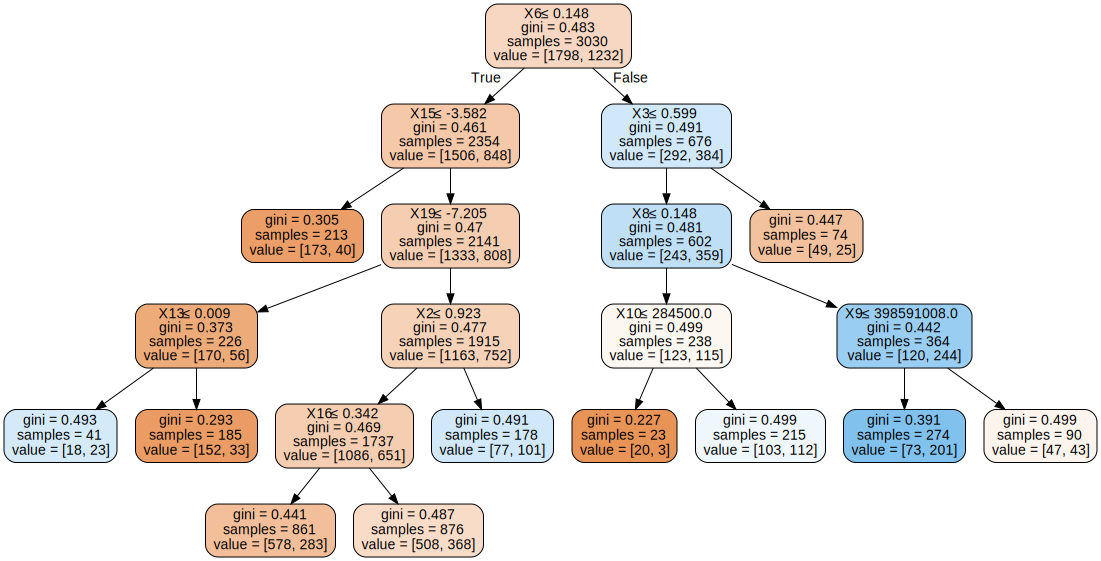

In [161]:
dot_data = tree.export_graphviz(DTC_GS.best_estimator_, out_file=None, 
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [162]:
print('The parameters combination that would give best accuracy is : ')
print(DTC_GS.best_params_)

The parameters combination that would give best accuracy is : 
{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 11}


In [163]:
resultsDF = resultsDF.sort_values(by = ["Precision"], ascending = False)
print("Ranked by Precision")
resultsDF

Ranked by Precision


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Decision Tree Classifier RUN 2 k=5 With Scoring method precision,0.708477,0.561904,0.497743,0.630033,0.617414
Decision Tree Classifier RUN 3 k=10 With Scoring method f1,0.701767,0.559174,0.481807,0.635314,0.591029
Decision Tree Classifier RUN 3 k=5 With Scoring method precision,0.698355,0.552820,0.494244,0.624752,0.637203
Decision Tree Classifier RUN 1 k=10 With Scoring method f1,0.692689,0.550886,0.487470,0.629043,0.626649
Decision Tree Classifier RUN 1 k=5 With Scoring method accuracy,0.690814,0.559348,0.505724,0.626073,0.634565
...,...,...,...,...,...
Gaussian Naive Bayes RUN 3 k=10,0.291557,0.500000,0.368333,0.000000,0.000000
Gaussian Naive Bayes RUN 3 k=20,0.290237,0.500000,0.367279,0.592409,0.580475
Gaussian Naive Bayes RUN 1 k=10,0.289578,0.500000,0.366750,0.592739,0.579156


In [164]:
resultsDF = resultsDF.sort_values(by = ["Recall"], ascending = False)
print("Ranked by Recall")
resultsDF

Ranked by Recall


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
KNN RUN 1 k=5 With Scoring method accuracy,0.637204,0.590014,0.577628,0.632013,0.645119
KNN RUN 3 k=10 With Scoring method precision,0.627876,0.587357,0.574398,0.633562,0.616352
Decision Tree Classifier RUN 1 k=20 With Scoring method precision,0.593963,0.587299,0.588245,0.700660,0.621372
Decision Tree Classifier RUN 1 k=10 With Scoring method recall,0.594889,0.585946,0.586047,0.679208,0.618734
KNN RUN 3 k=20 With Scoring method accuracy,0.614756,0.584473,0.576137,0.630693,0.631926
...,...,...,...,...,...
SVMLinear RUN 1 k=20 With Scoring method accuracy,0.445904,0.486125,0.402958,0.571287,0.572559
SVMLinear RUN 3 k=20 With Scoring method f1,0.424949,0.482902,0.384385,0.056156,0.070081
SVMLinear RUN 1 k=20 With Scoring method recall,0.431292,0.482879,0.393294,0.051655,0.044586


In [165]:
resultsDF = resultsDF.sort_values(by = ["Fscore"], ascending = False)
print("Ranked by F Measure")
resultsDF

Ranked by F Measure


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Decision Tree Classifier RUN 1 k=20 With Scoring method precision,0.593963,0.587299,0.588245,0.700660,0.621372
Decision Tree Classifier RUN 1 k=10 With Scoring method recall,0.594889,0.585946,0.586047,0.679208,0.618734
KNN RUN 1 k=5 With Scoring method accuracy,0.637204,0.590014,0.577628,0.632013,0.645119
KNN RUN 3 k=20 With Scoring method accuracy,0.614756,0.584473,0.576137,0.630693,0.631926
KNN RUN 3 k=10 With Scoring method precision,0.627876,0.587357,0.574398,0.633562,0.616352
...,...,...,...,...,...
Gaussian Naive Bayes RUN 3 k=10,0.291557,0.500000,0.368333,0.000000,0.000000
Gaussian Naive Bayes RUN 3 k=20,0.290237,0.500000,0.367279,0.592409,0.580475
Gaussian Naive Bayes RUN 1 k=10,0.289578,0.500000,0.366750,0.592739,0.579156


In [166]:
resultsDF = resultsDF.sort_values(by = ["Train score"], ascending = False)
print("Ranked by Train score")
resultsDF

Ranked by Train score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Gaussian Naive Bayes RUN 3 k=10,0.564526,0.535425,0.429828,0.891374,0.887043
Gaussian Naive Bayes RUN 2 k=20,0.563041,0.536070,0.433858,0.872306,0.880000
Gaussian Naive Bayes RUN 3 k=20,0.529243,0.516149,0.425288,0.870732,0.857585
Gaussian Naive Bayes RUN 1 k=20,0.559163,0.538115,0.447890,0.846093,0.856187
Gaussian Naive Bayes RUN 2 k=5,0.541733,0.529028,0.449282,0.844249,0.823920
...,...,...,...,...,...
Gaussian Naive Bayes RUN 2 k=10,0.306728,0.500000,0.380213,0.000000,0.000000
Gaussian Naive Bayes RUN 3 k=10,0.291557,0.500000,0.368333,0.000000,0.000000
Gaussian Naive Bayes RUN 2 k=10,0.292216,0.500000,0.368859,0.000000,0.000000


In [167]:
resultsDF = resultsDF.sort_values(by = ["Test score"], ascending = False)
print("Ranked by Test score")
resultsDF

Ranked by Test score


,Precision,Recall,Fscore,Train score,Test score
Classifier,,,,,
Gaussian Naive Bayes RUN 3 k=10,0.564526,0.535425,0.429828,0.891374,0.887043
Gaussian Naive Bayes RUN 2 k=20,0.563041,0.536070,0.433858,0.872306,0.880000
Gaussian Naive Bayes RUN 3 k=20,0.529243,0.516149,0.425288,0.870732,0.857585
Gaussian Naive Bayes RUN 1 k=20,0.559163,0.538115,0.447890,0.846093,0.856187
Gaussian Naive Bayes RUN 2 k=5,0.541733,0.529028,0.449282,0.844249,0.823920
...,...,...,...,...,...
Gaussian Naive Bayes RUN 2 k=10,0.306728,0.500000,0.380213,0.000000,0.000000
Gaussian Naive Bayes RUN 3 k=10,0.291557,0.500000,0.368333,0.000000,0.000000
Gaussian Naive Bayes RUN 2 k=10,0.292216,0.500000,0.368859,0.000000,0.000000
